#  Создание и настройка нейронной сети при помощи пакета `torch`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html
* https://pytorch.org/docs/stable/optim.html
* https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
* https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
* https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
* https://saturncloud.io/blog/can-i-use-tensorboard-with-google-colab/

## Задачи для совместного разбора

1\. Используя собственную реализацию нейрона и пакетного градиентного спуска, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE.

In [ ]:
from sklearn.datasets import make_regression
import torch as th
X, y, coef = make_regression(
    n_features=4,
    n_informative=4,
    coef=True,
    bias=0.5,
    random_state=42
)
X = th.FloatTensor(X)
y = th.FloatTensor(y)

In [ ]:
import torch
class Neuron:
  def __init__(self, n_inputs, requires_grad=False):
    self.weights = torch.normal(0, 1, (n_inputs, 1), requires_grad=requires_grad)
    self.bias = torch.normal(0, 1, (1, ), requires_grad=requires_grad)

  def forward(self, inputs):
    return inputs @ self.weights + self.bias

  # def backward(self, inputs, dldy):
  #   self.dw = dldy * inputs
  #   self.db = dldy

In [ ]:
class Loss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true).pow(2).mean()

  # def backward(self, y_pred, y_true):
  #   # dL/dy~
  #   self.dypred = 2*(y_pred - y_true)

In [ ]:
n_epochs = 100
gamma = 0.1
neuron = Neuron(n_inputs=4, requires_grad=True)
criterion = Loss()

for epoch in range(100):
  # 1. forward pass
  out = neuron.forward(X).flatten()
  loss = criterion.forward(out, y)
  # 2. backprop
  loss.backward()
  # 3. gradient descend
  with th.no_grad():
    neuron.weights -= gamma * neuron.weights.grad
    neuron.bias -= gamma * neuron.bias.grad

  # neuron.weights.data -= gamma * neuron.weights.grad
  # neuron.bias.data -= gamma * neuron.bias.grad

  # 4. zero grads
  neuron.weights.grad.zero_()
  neuron.bias.grad.zero_()

  print(f"{epoch=} {loss.item()=}")

In [ ]:
out.shape

In [ ]:
y.shape

In [ ]:
loss.backward()

In [ ]:
neuron.weights.grad

2\. Используя реализацию нейрона из `torch.nn`, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE. Для настройки весов реализуйте пакетный градиентный спуск с использованием `torch.optim`.

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
n_epochs = 100
gamma = 0.1
neuron = nn.Linear(in_features=4, out_features=1)
criterion = nn.MSELoss()
optimizer = optim.SGD(neuron.parameters(), lr=gamma)

for epoch in range(100):
  # 1. forward pass
  out = neuron(X).flatten()
  loss = criterion(out, y)
  # 2. backprop
  loss.backward()
  # 3. gradient descend
  optimizer.step()
  # 4. zero grads
  optimizer.zero_grad()

  print(f"{epoch=} {loss.item()=}")

3\. Добавьте визуализацию изменения значения функции потерь во время обучения, используя `tensorboard`.

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
writer = SummaryWriter("runs")

In [ ]:
!kill 1892

In [ ]:
from sklearn.datasets import make_classification
import torch as th
X, y = make_classification()
X = th.FloatTensor(X)
y = th.FloatTensor(y).long()

In [ ]:
X.shape

torch.Size([100, 20])

In [ ]:
y.unique()

tensor([0., 1.])

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
y

tensor([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1])

In [ ]:
n_epochs = 100
gamma = 0.1
neuron = nn.Linear(in_features=20, out_features=len(y.unique()))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(neuron.parameters(), lr=gamma)

for epoch in range(100):
  # 1. forward pass
  out = neuron(X)
  loss = criterion(out, y)
  # 2. backprop
  loss.backward()
  # 3. gradient descend
  optimizer.step()
  # 4. zero grads
  optimizer.zero_grad()

  print(f"{epoch=} {loss.item()=}")

In [ ]:
out

## Задачи для самостоятельного решения

In [ ]:
from sklearn.datasets import make_regression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch as th
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.datasets import make_circles
import torch as th
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<p class="task" id="1"></p>

### 1
Используя собственную реализацию полносвязного слоя и мини-пакетного градиентного спуска, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [ ]:
class FullyConnectedLayer:
    def __init__(self, n_inputs, n_out, requires_grad=False):
        self.weights = torch.normal(0, 1, (n_inputs, n_out), requires_grad=requires_grad)
        self.bias = torch.normal(0, 1, (1, ), requires_grad=requires_grad)

    def forward(self, inputs):
        return inputs @ self.weights + self.bias

class Loss:
    def forward(self, y_pred, y_true):
        return (y_pred - y_true).pow(2).mean()

epoch=50 loss.item()=1.3194395303726196
epoch=100 loss.item()=1.8046417236328125
epoch=150 loss.item()=1.4200586080551147
epoch=200 loss.item()=1.0017602443695068
epoch=250 loss.item()=0.7502857446670532
epoch=300 loss.item()=0.5592130422592163
epoch=350 loss.item()=0.42333489656448364
epoch=400 loss.item()=0.3288986086845398
epoch=450 loss.item()=0.2624967396259308
epoch=500 loss.item()=0.21475347876548767
epoch=550 loss.item()=0.17893818020820618
epoch=600 loss.item()=0.15070083737373352
epoch=650 loss.item()=0.12256220728158951
epoch=700 loss.item()=0.09686999022960663
epoch=750 loss.item()=0.07713571935892105
epoch=800 loss.item()=0.0626908540725708
epoch=850 loss.item()=0.052123527973890305
epoch=900 loss.item()=0.044523876160383224
epoch=950 loss.item()=0.03881687670946121
epoch=1000 loss.item()=0.03482106328010559


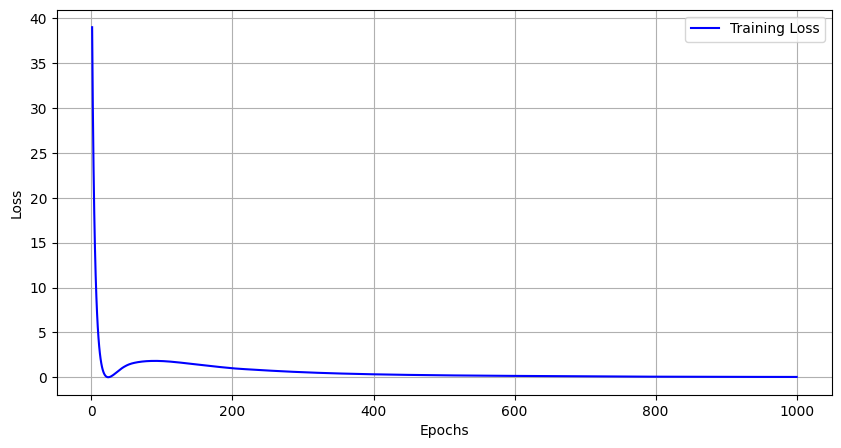

In [ ]:
torch.manual_seed(42)

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

gamma = 0.0001
batch_size = 10

fc1 = FullyConnectedLayer(n_inputs=1, n_out=10, requires_grad=True)
relu = nn.ReLU()
fc2 = FullyConnectedLayer(n_inputs=10, n_out=1, requires_grad=True)
criterion = Loss()

losses = []

for epoch in range(1, 1001):
    for i in range(0, len(X), batch_size):
        # 1. forward pass
        batch_X = X[i:i+batch_size]
        batch_y = y[i:i+batch_size]

        out = fc1.forward(batch_X)
        out = relu(out)
        out = fc2.forward(out)
        loss = criterion.forward(out, batch_y)

        # 2. backprop
        loss.backward()

        # 3. gradient descend
        with torch.no_grad():
            fc2.weights -= gamma * fc2.weights.grad
            fc2.bias -= gamma * fc2.bias.grad
            fc1.weights -= gamma * fc1.weights.grad
            fc1.bias -= gamma * fc1.bias.grad

        # 4. zero grads
        fc1.weights.grad.zero_()
        fc1.bias.grad.zero_()
        fc2.weights.grad.zero_()
        fc2.bias.grad.zero_()

    losses.append(loss.item())
    if epoch % 50 == 0:
        print(f"{epoch=} {loss.item()=}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses, color='b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="2"></p>

### 2
Используя реализацию полносвязного слоя из `torch.nn` решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Для создания модели опишите класс `Net`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [ ]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.layer1 = nn.Linear(in_features=1, out_features=10)
#         self.relu = nn.ReLU()
#         self.layer2 = nn.Linear(in_features=10, out_features=1)

#     def forward(self, x):
#         x = self.layer1(x)
#         x = self.relu(x)
#         x = self.layer2(x)
#         return x

In [ ]:
class Net():
    def __init__(self, n_in, n_hidden, n_out):
        self.layer1 = nn.Linear(in_features=n_in, out_features=n_hidden)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(in_features=n_hidden, out_features=n_out)

    def forward(self, x):
        x = self.layer1.forward(x)
        x = self.relu.forward(x)
        x = self.layer2.forward(x)
        return x

epoch=320 loss.item()=0.14548513293266296
epoch=640 loss.item()=0.11382629722356796
epoch=960 loss.item()=0.0962100476026535
epoch=1280 loss.item()=0.08275473117828369
epoch=1600 loss.item()=0.07070066779851913
epoch=1920 loss.item()=0.05949786305427551
epoch=2240 loss.item()=0.04940333217382431
epoch=2560 loss.item()=0.0410236157476902
epoch=2880 loss.item()=0.03510979935526848
epoch=3200 loss.item()=0.03241851180791855


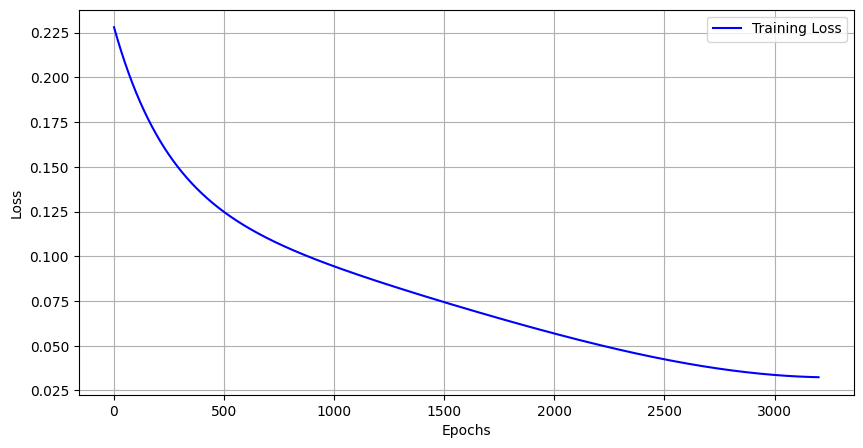

In [ ]:
torch.manual_seed(42)

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

lr = 0.0001
batch_size = 10

model = Net(1, 10, 1)
criterion = nn.MSELoss()
optimizer1 = optim.SGD(model.layer1.parameters(), lr)
optimizer2 = optim.SGD(model.layer2.parameters(), lr)

losses = []

for epoch in range(1, 3201):
    for i in range(0, len(X), batch_size):
        # 1. forward pass
        batch_X = X[i:i+batch_size]
        batch_y = y[i:i+batch_size]

        predictions = model.forward(batch_X)
        loss = criterion.forward(predictions, batch_y)

        # 2. backprop
        loss.backward()

        # 3. gradient descend
        optimizer1.step()
        optimizer2.step()

        # 4. zero grads
        optimizer1.zero_grad()
        optimizer2.zero_grad()

    losses.append(loss.item())
    if epoch % 320 == 0:
        print(f"{epoch=} {loss.item()=}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses, color='b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="3"></p>

### 3
Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Для создания модели создайте объект класса `nn.Sequential`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

epoch=320 loss.item()=0.14548513293266296
epoch=640 loss.item()=0.11382629722356796
epoch=960 loss.item()=0.0962100476026535
epoch=1280 loss.item()=0.08275473117828369
epoch=1600 loss.item()=0.07070066779851913
epoch=1920 loss.item()=0.05949786305427551
epoch=2240 loss.item()=0.04940333217382431
epoch=2560 loss.item()=0.0410236157476902
epoch=2880 loss.item()=0.03510979935526848
epoch=3200 loss.item()=0.03241851180791855


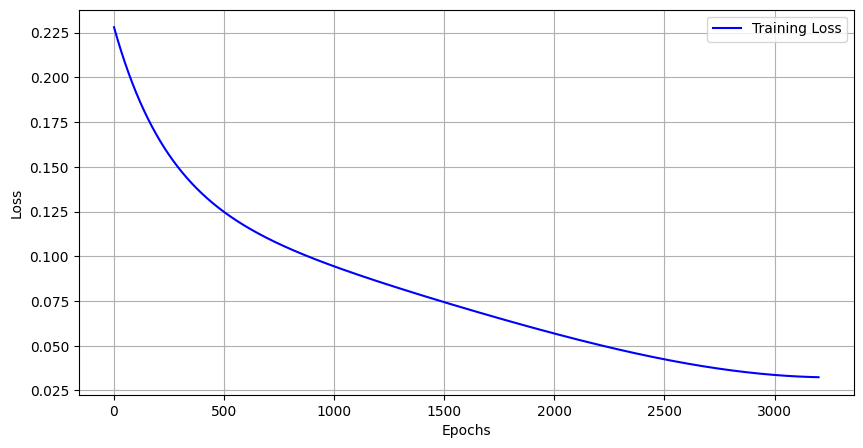

In [ ]:
torch.manual_seed(42)

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

lr = 0.0001
batch_size = 10

model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr)

losses = []

for epoch in range(1, 3201):
    for i in range(0, len(X), batch_size):
        # 1. forward pass
        batch_X = X[i:i+batch_size]
        batch_y = y[i:i+batch_size]

        predictions = model.forward(batch_X)
        loss = criterion.forward(predictions, batch_y)

        # 2. backprop
        loss.backward()

        # 3. gradient descend
        optimizer.step()

        # 4. zero grads
        optimizer.zero_grad()

    losses.append(loss.item())
    if epoch % 320 == 0:
        print(f"{epoch=} {loss.item()=}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses, color='b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="4"></p>

### 4
Используя реализацию полносвязного слоя из `torch.nn`, решите задачу классификации. В качестве функции потерь используйте реализацию `CrossEntropyLoss` из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`.

Создайте и настройте две модели.

Модель 1:
1. Полносвязный слой с 10 нейронами;
3. Полносвязный слой с 2 нейронами.

Модель 2:
1. Полносвязный слой с 10 нейронами;
2. Функция активации ReLU;
3. Полносвязный слой с 2 нейронами.

Для каждой модели выведите отчет по классификации и визуализацию результатов, где точки раскрашены в цвет наиболее вероятного класса.

- [ ] Проверено на семинаре

Model №1:
              precision    recall  f1-score   support

           0       0.52      0.39      0.44       500
           1       0.51      0.65      0.57       500

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.52      0.52      0.51      1000

Model №2 (w/ ReLu):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       500
           1       0.95      0.96      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



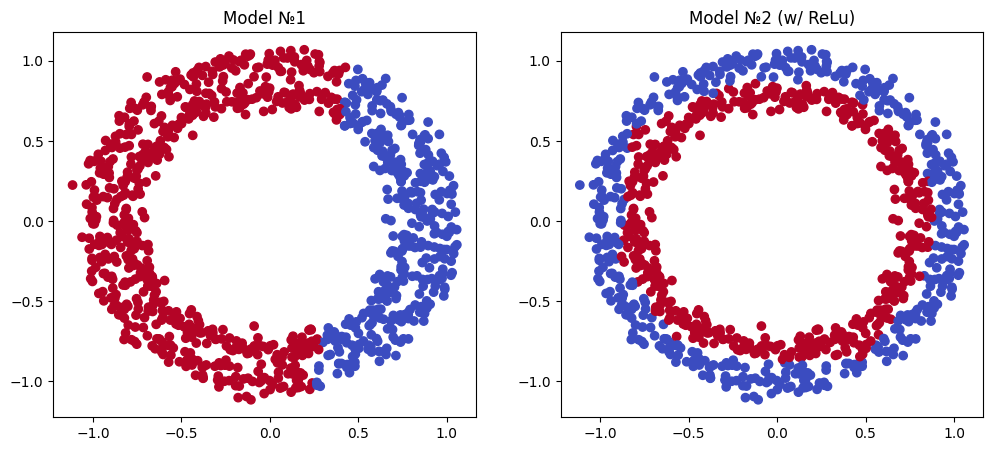

In [ ]:
torch.manual_seed(42)

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

# Модель 1
class Model1():
    def __init__(self, n_in, n_hidden, n_out):
        self.layer1 = nn.Linear(in_features=n_in, out_features=n_hidden)
        self.layer2 = nn.Linear(in_features=n_hidden, out_features=n_out)

    def forward(self, x):
        x = self.layer1.forward(x)
        x = self.layer2.forward(x)
        return x

# Модель 2
class Model2():
    def __init__(self, n_in, n_hidden, n_out):
        self.layer1 = nn.Linear(in_features=n_in, out_features=n_hidden)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(in_features=n_hidden, out_features=n_out)

    def forward(self, x):
        x = self.layer1.forward(x)
        x = self.relu.forward(x)
        x = self.layer2.forward(x)
        return x

model1 = Model1(2, 10, 2)
model2 = Model2(2, 10, 2)
criterion = nn.CrossEntropyLoss()
optimizer11 = optim.SGD(model1.layer1.parameters(), lr=0.01)
optimizer12 = optim.SGD(model1.layer2.parameters(), lr=0.01)
optimizer21 = optim.SGD(model2.layer1.parameters(), lr=0.01)
optimizer22 = optim.SGD(model2.layer2.parameters(), lr=0.01)

num_epochs = 2000
batch_size = 100

for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        inputs = X[i:i+batch_size]
        labels = y[i:i+batch_size]

        # Модель 1
        outputs1 = model1.forward(inputs)
        loss1 = criterion.forward(outputs1, labels)
        loss1.backward()
        optimizer11.step()
        optimizer12.step()
        optimizer11.zero_grad()
        optimizer12.zero_grad()

        # Модель 2
        outputs2 = model2.forward(inputs)
        loss2 = criterion.forward(outputs2, labels)
        loss2.backward()
        optimizer21.step()
        optimizer22.step()
        optimizer21.zero_grad()
        optimizer22.zero_grad()

# Модель 1
with th.no_grad():
    outputs1 = model1.forward(X)
    _, predicted1 = th.max(outputs1, 1)
    print("Model №1:")
    print(classification_report(y, predicted1))

# Модель 2
with th.no_grad():
    outputs2 = model2.forward(X)
    _, predicted2 = th.max(outputs2, 1)
    print("Model №2 (w/ ReLu):")
    print(classification_report(y, predicted2))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Model №1")
plt.scatter(X[:, 0], X[:, 1], c=predicted1, cmap='coolwarm')

plt.subplot(1, 2, 2)
plt.title("Model №2 (w/ ReLu)")
plt.scatter(X[:, 0], X[:, 1], c=predicted2, cmap='coolwarm')

plt.show()

<p class="task" id="5"></p>

### 5
Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Перенесите вычисления на GPU и сравните время обучения с и без использования GPU. Решение должно корректно работать в случае отсутствия GPU без дополнительных изменений в коде.

- [ ] Проверено на семинаре

In [ ]:
torch.manual_seed(42)

X, y, coef = make_regression(
    n_samples=10000,
    n_features=10,
    n_informative=6,
    coef=True,
    bias=0.5,
    random_state=42
)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
# CPU
%%timeit

torch.manual_seed(42)

lr = 0.001
batch_size = 1000

model = nn.Sequential(
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr)

losses = []

for epoch in range(1, 3001):
    for i in range(0, len(X), batch_size):
        # 1. forward pass
        batch_X = X[i:i+batch_size]
        batch_y = y[i:i+batch_size]

        predictions = model.forward(batch_X)
        loss = criterion.forward(predictions, batch_y)

        # 2. backprop
        loss.backward()

        # 3. gradient descend
        optimizer.step()

        # 4. zero grads
        optimizer.zero_grad()

    losses.append(loss.item())
    if epoch % 3000 == 0:
        print(f"{epoch=} {loss.item()=}")

epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
17.5 s ± 921 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# GPU
%%timeit

torch.manual_seed(42)

lr = 0.001
batch_size = 1000

model = nn.Sequential(
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr)

losses = []

for epoch in range(1, 3001):
    for i in range(0, len(X), batch_size):
        # 1. forward pass
        batch_X = X[i:i+batch_size]
        batch_y = y[i:i+batch_size]

        predictions = model.forward(batch_X)
        loss = criterion.forward(predictions, batch_y)

        # 2. backprop
        loss.backward()

        # 3. gradient descend
        optimizer.step()

        # 4. zero grads
        optimizer.zero_grad()

    losses.append(loss.item())
    if epoch % 3000 == 0:
        print(f"{epoch=} {loss.item()=}")

epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
epoch=3000 loss.item()=0.0006366505986079574
14.2 s ± 286 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# CPU - 17.5 s
# GPU - 14.2 s (-18.86%)

<p class="task" id="6"></p>

### 6
Используя `torch`, решите задачу классификации. Разделите данные на обучающую и валидационную выборку.  Для настройки весов реализуйте мини-пакетный градиентный спуск на основе данных обучающих выборки.

Используйте `tensorboard` для отслеживания процесса обучения модели. Для каждой эпохи оцените и сохраните среднее значение функции потерь по батчам (для обучающей выборки) и значение функции потерь для валидационной выборки. Визуализируйте граф вычислений модели. Добавьте визуализацию матрицы несоответствий (данную визуализацию можно сохранять не каждую эпоху, а с некоторой частотой) на валидационной выборке. Продемонстрируйте скриншоты интерфейса tensorboard с визуализациями.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

In [ ]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

## Обратная связь
- [x] Хочу получить обратную связь по решению